In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LogLocator, MaxNLocator
import torch

# Plot other quantities for appendix
The goal here is to plot the remaining quantities (Hamming distance, parameter distance, training loss) for the appendix. Also ran for 1M steps (instead of 100k) as that allows for training losses dropping lower for $(\delta, \sigma)$ settings where they're slower.

In [2]:
scales = np.logspace(-1, 0.3, 17)  # 11 points before
deltas = np.linspace(-1, 1, 17)
train_seeds = np.arange(100, 116)

checkpoints_to_save = (0, 10, 100, 1_000, 10_000, 100_000, 1_000_000)

In [3]:
m = 50
n = 1_000
d = 100
n_iter = 1_000_000
base_lr = 5e-3

kernel_distance = np.zeros((len(train_seeds), len(scales), len(deltas), len(checkpoints_to_save)))
test_losses = np.zeros((len(train_seeds), len(scales), len(deltas), len(checkpoints_to_save)))
hamming_distance = np.zeros((len(train_seeds), len(scales), len(deltas), len(checkpoints_to_save)))
parameter_distance = np.zeros((len(train_seeds), len(scales), len(deltas), len(checkpoints_to_save)))
train_losses = np.zeros((len(train_seeds), len(scales), len(deltas), len(checkpoints_to_save)))

args = []
for scale in scales:
    for delta in deltas:
        for seed in train_seeds:
            args.append((scale, delta, seed))

# Will save both kernel distances and test losses
count = 0
for _i, scale in enumerate(scales):
    for _j, delta in enumerate(deltas):
        for _k, seed in enumerate(train_seeds):
            out = torch.load(f"dummy_results_longer/{scale}_{delta}_{seed}.pth")["nn"]
            # Saving order was a bit different here
            test_losses[_k, _i, _j] = out[1]
            kernel_distance[_k, _i, _j] = out[0]
            hamming_distance[_k, _i, _j] = out[2]
            parameter_distance[_k, _i, _j] = out[3]
            # NOTE: 100 was checkpoint frequency. Will ignore 0 and 100 but others should be fine.
            # Casting as out as np.array since it's a list
            train_losses[_k, _i, _j] = np.array(out[4])[np.array(checkpoints_to_save) // 100]
            count += 1

            if count % 100 == 0:
                print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600


In [4]:
# Seems only from first seed. Maybe make function `get_features_two_layer_relu` float64
print(kernel_distance.shape)
print(np.where([kernel_distance[..., 1] < 0])[0])

(16, 17, 17, 7)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
print(parameter_distance[..., 0].min(), parameter_distance[..., 0].max())
print(kernel_distance[..., 0].min(), kernel_distance[..., 0].max())
print(hamming_distance[..., 0].min(), hamming_distance[..., 0].max())

0.0 0.0
-9.5367431640625e-07 8.344650268554688e-07
0.0 0.0


In [6]:
test_losses[..., -1].mean(axis=0) - test_losses[..., -2].mean(axis=0)

array([[ 4.57778633e-11,  7.95991307e-11,  1.27437367e-10,
         1.71421051e-10,  5.50382110e-10,  5.18366037e-10,
         4.59536321e-10, -7.89523090e-10, -1.21208196e-07,
        -4.61570353e-09, -7.57704880e-11, -1.74035330e-12,
        -5.43369603e-14, -7.15248173e-16, -8.78203760e-18,
        -2.16840434e-19, -5.42101086e-19],
       [ 2.79603404e-09,  3.21048138e-09,  4.19659313e-09,
         5.87614273e-09,  8.85239478e-09,  7.56969841e-09,
         8.58135324e-09,  3.32077229e-10, -1.79854758e-07,
        -2.04556176e-08, -4.63136786e-10, -1.01473187e-11,
        -1.75570604e-13, -3.23048879e-15, -1.45174671e-16,
        -1.51788304e-17, -1.30104261e-18],
       [ 6.19552649e-08,  6.32844537e-08,  5.98453885e-08,
         7.87572463e-08,  7.95840530e-08,  6.98784842e-08,
         7.07845770e-08,  2.89874882e-08, -2.10438624e-07,
        -6.99154576e-08, -2.98463216e-09, -1.27542972e-10,
        -4.69633360e-12, -1.47843326e-13, -6.57677038e-15,
        -2.78856799e-16, -1.0

In [7]:
def style_heatmaps(ax, yticks=False):
    # if xlabels:
    #     ax.tick_params(axis="x", which="both", bottom=True, top=False,
    #                    labelbottom=True, left=True, right=False,
    #                    labelleft=True, direction='out',length=7,width=1.5,pad=0,
    #                    labelsize=labelsize,labelrotation=45)
    # ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    # else:
    #     ax.tick_params(axis="x", which="both", bottom=True, top=False,
    #                    labelbottom=True, left=True, right=False,
    #                    labelleft=True, direction='out',length=7,width=1.5,pad=0,
    #                    labelsize=labelsize,labelrotation=45)
    #     ax.set_xlabel("")
    if yticks:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                    labelbottom=True, left=True, right=False,
                    labelleft=True, direction='out',length=7,width=1.5,pad=4,
                    labelsize=24)   
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    # else:
    #     ax.tick_params(axis="y", which="both", bottom=True, top=False,
    #                labelbottom=False, left=True, right=False,
    #                labelleft=False, direction='out',length=7,width=1.5,pad=4,
    #                labelsize=labelsize)
    #     ax.set_ylabel("")
    ax.xaxis.offsetText.set_fontsize(20)

    # Boundary
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)

In [8]:
def scientific_formatter(x, pos):
    if x == 0:
        return "0"
    coeff, expon = '{:.1e}'.format(x).split('e')
    return r'${} \times 10^{{{}}}$'.format(coeff, int(expon))

In [9]:
test_losses.mean(axis=0).max()

0.016476159053369886

Test Loss
0.013551085757447342 0.001516765863422086
0.007902069026271866 0.0008675403343536722
0.003914552295271017 0.0007295350690735051
0.004897679045177946 0.0006912106765634336
0.004972677078279958 0.0006910894683672683
Kernel Distance
0.2385023795068264 3.149360418319702e-05
0.5370317734777927 0.00022741034626960754
0.6101670861244202 0.0004668794572353363
0.6149804331362247 0.0007804930210113525
0.6150032691657543 0.0008004903793334961


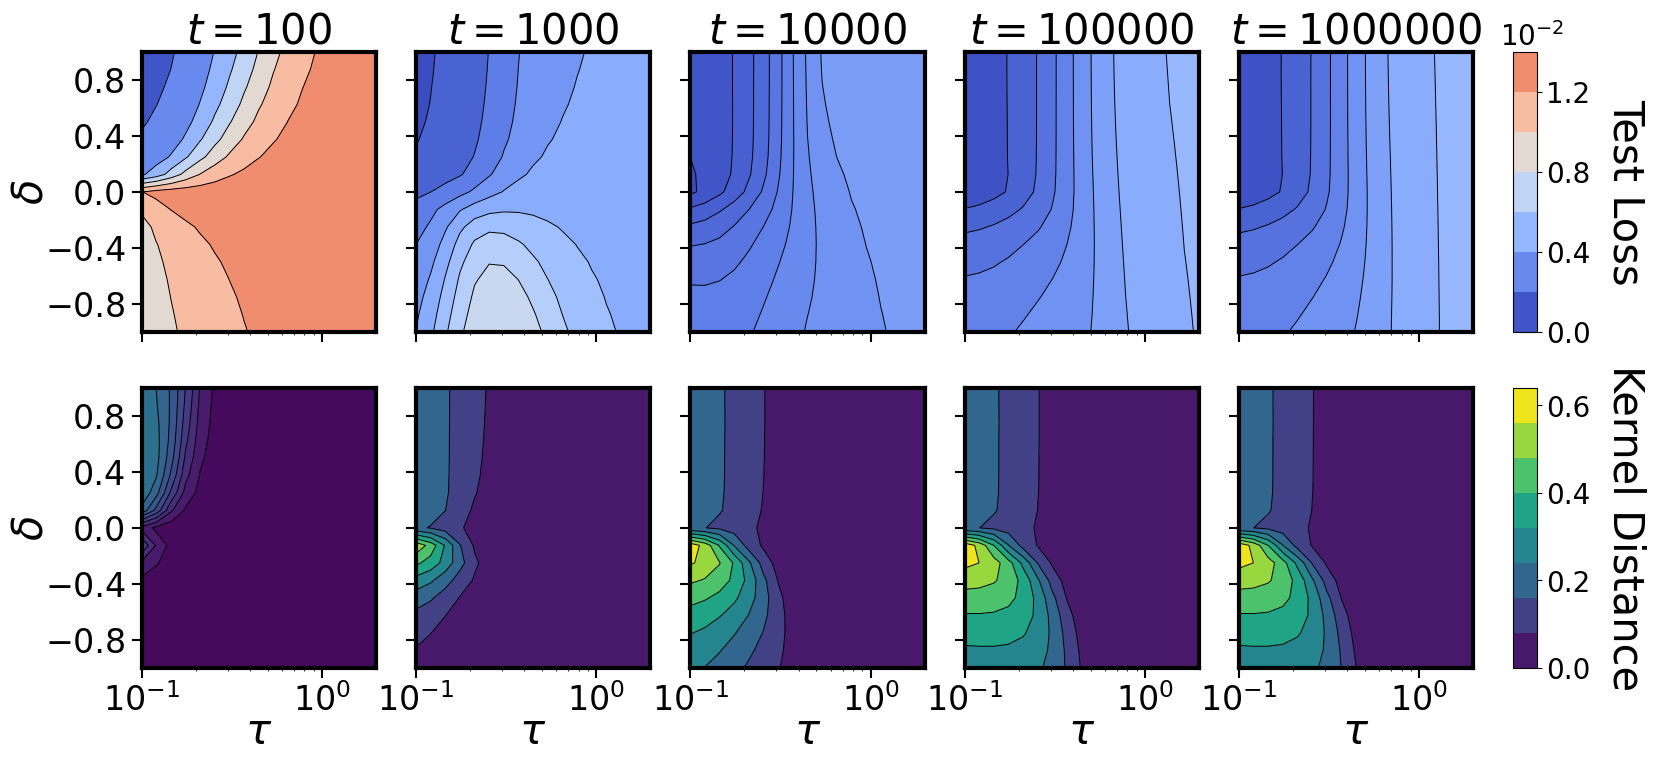

In [39]:
x_, y_ = np.meshgrid(scales, deltas)

fig = plt.figure(figsize=(18, 8))
# gs = fig.add_gridspec(2, 5, width_ratios=[1, 1, 1, 1, 0.1])
gs = fig.add_gridspec(2, 6, width_ratios=[1, 1, 1, 1, 1, 0.1])

# Create subplots
axs = [[], []]
for _row in range(2):
    # for _col in range(4):
    for _col in range(5):
        if _col == 0:
            axs[_row].append(fig.add_subplot(gs[_row, _col]))
        else:
            axs[_row].append(fig.add_subplot(gs[_row, _col], sharey=axs[_row][0]))

print("Test Loss")
axs_row = axs[0]
# for _i in range(2, len(checkpoints_to_save) - 1):  # NOTE: subtracting 1 from end to first just plot up to 100k steps
for _i in range(2, len(checkpoints_to_save)):

    test_loss_avgd = test_losses[..., _i].mean(axis=0)
    print(test_loss_avgd.max(), test_loss_avgd.min())
    ax = axs_row[_i - 2]

    if _i == 2:
        out = ax.contourf(x_, y_, test_loss_avgd.T, vmin=test_losses.mean(axis=0).min(), vmax=test_losses.mean(axis=0).max(), cmap="coolwarm")
    else:
        ax.contourf(x_, y_, test_loss_avgd.T, vmin=test_losses.mean(axis=0).min(), vmax=test_losses.mean(axis=0).max(), cmap="coolwarm")
    
    ax.contour(x_, y_, test_loss_avgd.T, colors='black', linestyles='-', linewidths=0.7)

    # plt.colorbar(out)
    # ax.set_xlabel("$\\tau$", labelpad=5, fontsize=20)
    if _i == 2:
        ax.set_ylabel("$\\delta$", labelpad=-5, fontsize=30)
    ax.set_xscale("log")
    ax.set_title(f"$t=${checkpoints_to_save[_i]}", fontsize=30)

    style_heatmaps(ax, yticks=True)  #  , yticks=(_i == 2))
    if _i > 2:
        plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis="x", labelsize=24, length=7, width=1.5, pad=4)
    plt.setp(ax.get_xticklabels(), visible=False)

cbar1 = fig.colorbar(out, ax=axs, cax=fig.add_subplot(gs[0, -1]))
cbar1.locator = MaxNLocator(nbins=4)

# Option 1
tick_positions = [0, 0.004, 0.008, 0.012]
cbar1.set_ticks(tick_positions)
ticks = cbar1.ax.get_yticks()
cbar1.ax.set_yticklabels([f"{tick / 0.01:.1f}" if tick > 0 else "$0.0$" for tick in ticks])
cbar1.ax.text(0.8, 1., "$10^{-2}$", transform=cbar1.ax.transAxes, ha='center', va='bottom', fontsize=20)

cbar1.set_label("Test Loss", rotation=270, labelpad=40, fontsize=30)
# cbar1.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1e}'.format(x)))
cbar1.ax.tick_params(labelsize=20)

print("Kernel Distance")
axs_row = axs[1]
# for _i in range(2, len(checkpoints_to_save) - 1):
for _i in range(2, len(checkpoints_to_save)):
    kernel_avgd = kernel_distance[..., _i].mean(axis=0)
    print(kernel_avgd.max(), kernel_avgd.min())
    ax = axs_row[_i - 2]

    # NOTE: it *is* important that the final `out` is what it is here
    out = ax.contourf(x_, y_, kernel_avgd.T, vmin=kernel_distance.mean(axis=0).min(), vmax=kernel_distance.mean(axis=0).max())
    ax.contour(x_, y_, kernel_avgd.T, colors='black', linestyles='-', linewidths=0.7)

    # plt.colorbar(out)
    ax.set_xlabel("$\\tau$", labelpad=-5, fontsize=30)
    if _i == 2:
        ax.set_ylabel("$\\delta$", labelpad=-5, fontsize=30)
    ax.set_xscale("log")

    style_heatmaps(ax, yticks=True)  #  , yticks=(_i == 2))
    if _i > 2:
        plt.setp(ax.get_yticklabels(), visible=False)
    style_heatmaps(ax, yticks=(_i == 2))

    ax.tick_params(axis="x", labelsize=24, length=7, width=1.5, pad=4)

cbar1 = fig.colorbar(out, ax=axs, cax=fig.add_subplot(gs[1, -1]))  # , format="%.1f")

# Option 1:
# cbar1.locator = MaxNLocator(nbins=4)

# Option 2:
tick_positions = [0, 0.2, 0.4, 0.6]
cbar1.set_ticks(tick_positions)

cbar1.set_label("Kernel Distance", rotation=270, labelpad=40, fontsize=30)
# cbar1.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0e}'.format(x)))

# cbar1.ax.yaxis.set_major_formatter(FuncFormatter(scientific_formatter))
# cbar_top = Colorbar(ax=cbar1.ax, mappable=out, orientation='horizontal', format=FuncFormatter(lambda x, _: '{:.0e}'.format(x)))
# cbar_top.set_label('Shared Order of Magnitude', fontsize=12)
cbar1.ax.tick_params(labelsize=20)

plt.savefig("motivating/test_loss_and_kernel_distance.pdf", bbox_inches="tight")

Kernel Distance
0.2385023795068264 3.149360418319702e-05
0.5370317734777927 0.00022741034626960754
0.6101670861244202 0.0004668794572353363
0.6149804331362247 0.0007804930210113525
0.6150032691657543 0.0008004903793334961
Hamming Distance
20.308249999999997 0.019937500000000004
20.9874375 0.10418750000000002
21.1481875 0.20787500000000003
21.176875 0.33975
21.182499999999997 0.34862499999999996
Parameter Distance
0.7275941635870667 0.021125402799886357
1.8067048938317307 0.11547998826201523
3.0691807466792302 0.21264061482933358
3.1610897947424963 0.3149263900172008
3.161089840857269 0.32036075920140705
Train Loss
0.013349987682026195 0.00042371969389529634
0.007320173014769789 3.968134084134483e-06
0.0013648208235912127 4.3315831386976985e-10
2.9392380183047915e-05 1.1507858246254203e-31
2.0819360991519763e-08 2.754297764678197e-32
Test Loss
0.013551085757447342 0.001516765863422086
0.007902069026271866 0.0008675403343536722
0.003914552295271017 0.0007295350690735051
0.004897679045177

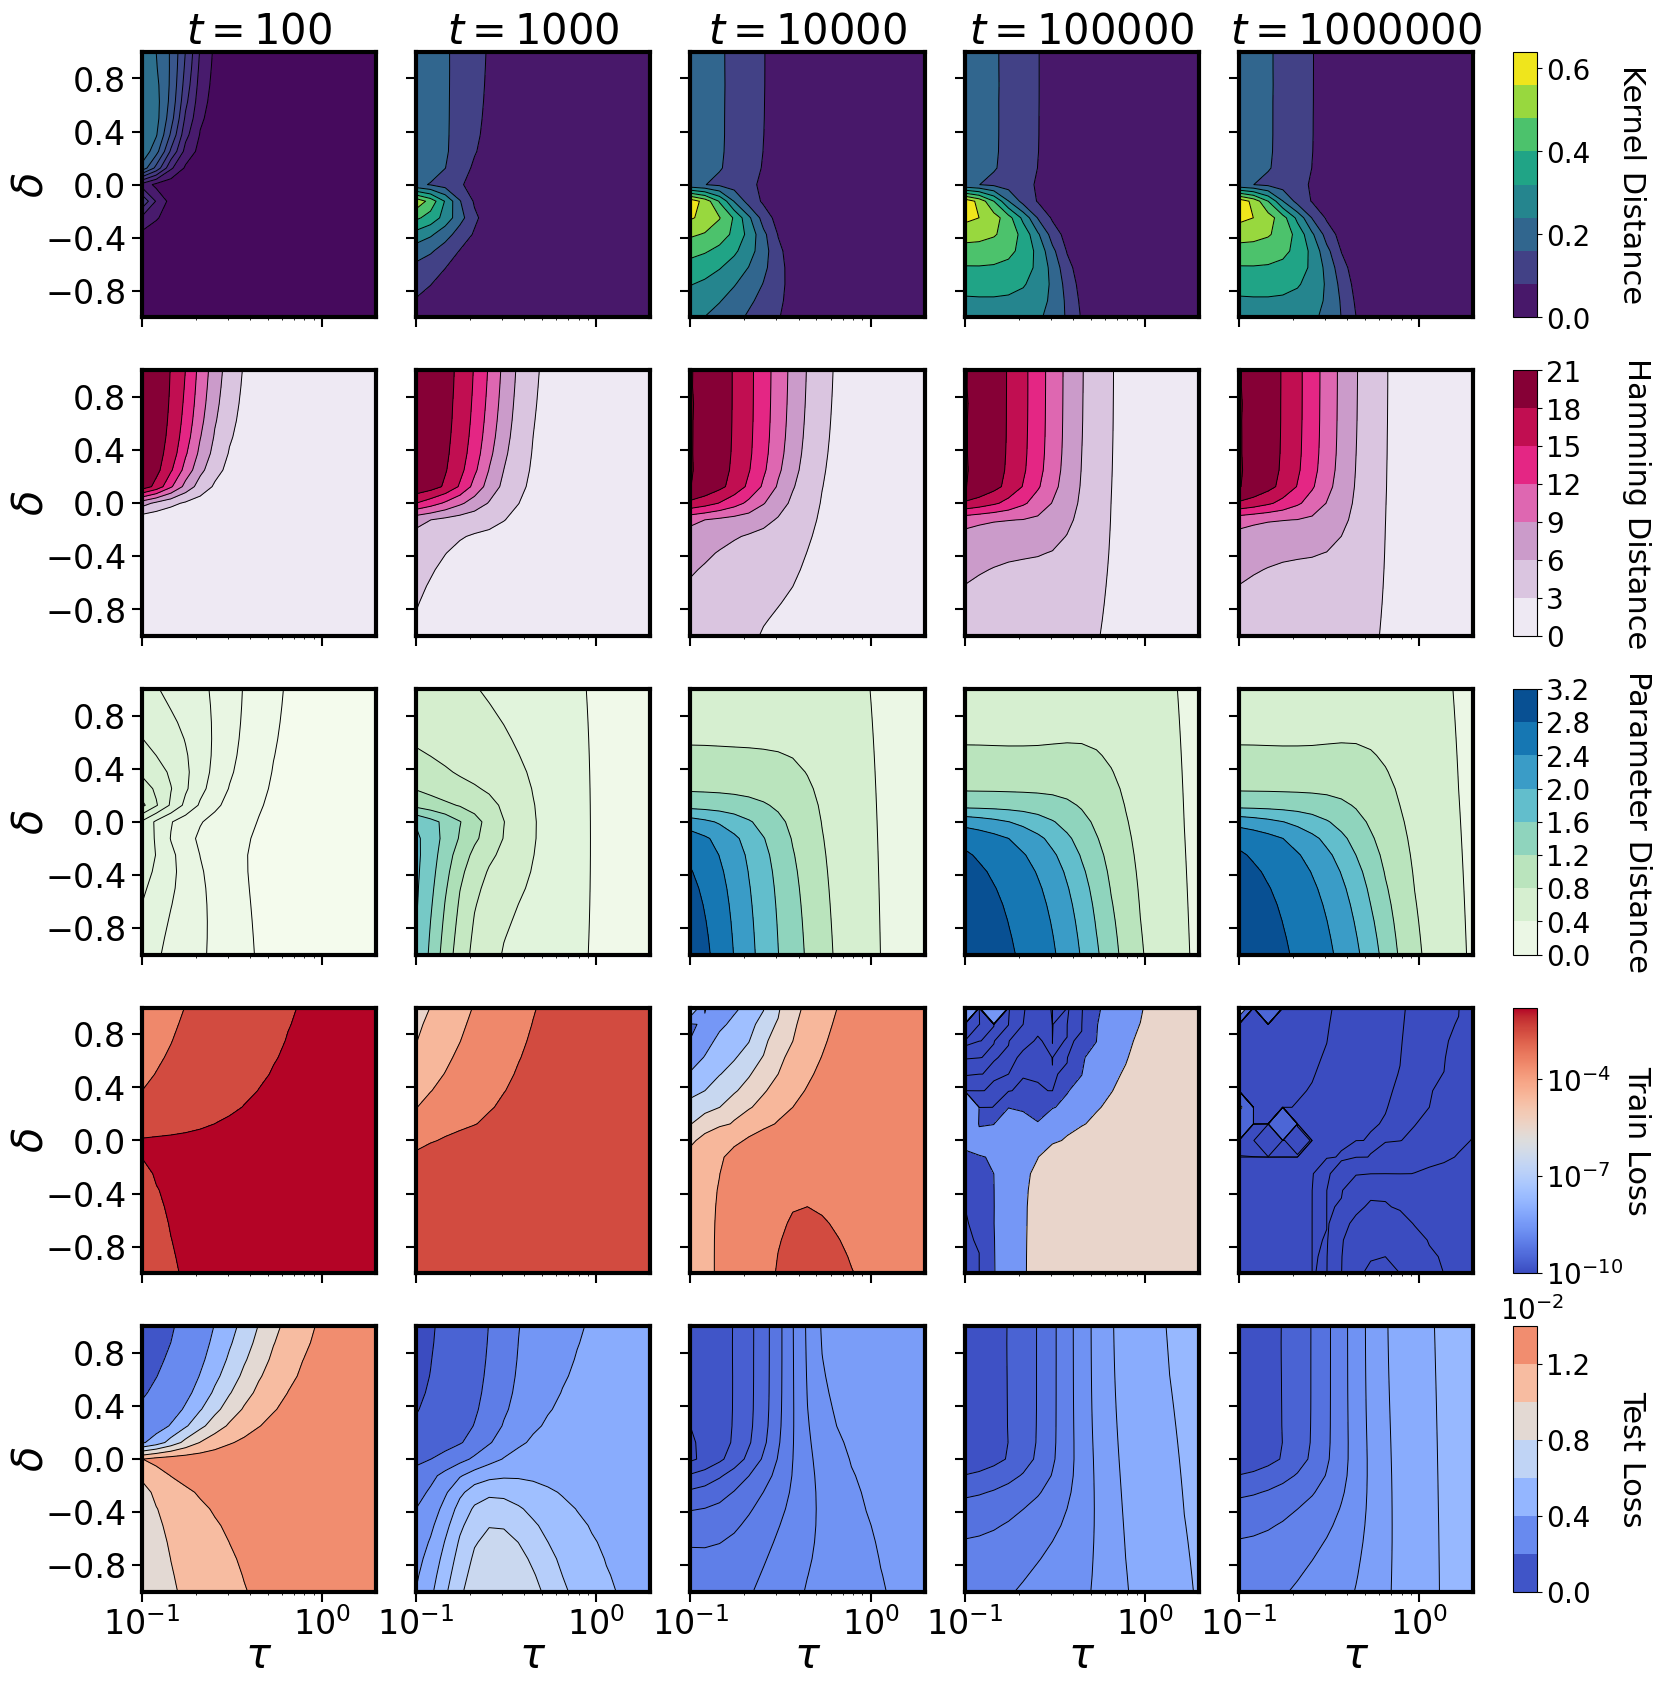

In [17]:
from matplotlib.ticker import LogLocator, MaxNLocator
x_, y_ = np.meshgrid(scales, deltas)

n_rows = 5  # main figure just had 2
n_cols = 6
fig = plt.figure(figsize=(18, 4 * n_rows))
gs = fig.add_gridspec(n_rows, n_cols, width_ratios=[1, 1, 1, 1, 1, 0.1])

# Create subplots
axs = [[], [], [], [], []]
for _row in range(n_rows):
    for _col in range(n_cols - 1):
        if _col == 0:
            axs[_row].append(fig.add_subplot(gs[_row, _col]))
        else:
            axs[_row].append(fig.add_subplot(gs[_row, _col], sharey=axs[_row][0]))

print("Kernel Distance")
axs_row = axs[0]
# for _i in range(2, len(checkpoints_to_save) - 1):
for _i in range(2, len(checkpoints_to_save)):
    kernel_avgd = kernel_distance[..., _i].mean(axis=0)
    print(kernel_avgd.max(), kernel_avgd.min())
    ax = axs_row[_i - 2]

    # NOTE: it *is* important that the final `out` is what it is here
    out = ax.contourf(x_, y_, kernel_avgd.T, vmin=kernel_distance.mean(axis=0).min(), vmax=kernel_distance.mean(axis=0).max())
    ax.contour(x_, y_, kernel_avgd.T, colors='black', linestyles='-', linewidths=0.7)

    # plt.colorbar(out)
    if _i == 2:
        ax.set_ylabel("$\\delta$", labelpad=-5, fontsize=30)
    ax.set_xscale("log")
    ax.set_title(f"$t=${checkpoints_to_save[_i]}", fontsize=30)

    style_heatmaps(ax, yticks=True)  #  , yticks=(_i == 2))
    if _i > 2:
        plt.setp(ax.get_yticklabels(), visible=False)
    style_heatmaps(ax, yticks=(_i == 2))

    ax.tick_params(axis="x", labelsize=24, length=7, width=1.5, pad=4)
    plt.setp(ax.get_xticklabels(), visible=False)

cbar1 = fig.colorbar(out, ax=axs, cax=fig.add_subplot(gs[0, -1]))
tick_positions = [0, 0.2, 0.4, 0.6]
cbar1.set_ticks(tick_positions)
cbar1.set_label("Kernel Distance", rotation=270, labelpad=40, fontsize=22)
cbar1.ax.tick_params(labelsize=20)

print("Hamming Distance")
axs_row = axs[1]
for _i in range(2, len(checkpoints_to_save)):  # NOTE: subtracting 1 from end to first just plot up to 100k steps

    hamming_distance_avgd = hamming_distance[..., _i].mean(axis=0)
    print(hamming_distance_avgd.max(), hamming_distance_avgd.min())
    ax = axs_row[_i - 2]

    cmap = "PuRd"  # and GnBu
    if _i == 2:
        out = ax.contourf(x_, y_, hamming_distance_avgd.T, vmin=hamming_distance.mean(axis=0).min(), vmax=hamming_distance.mean(axis=0).max(), cmap=cmap)
    else:
        ax.contourf(x_, y_, hamming_distance_avgd.T, vmin=hamming_distance.mean(axis=0).min(), vmax=hamming_distance.mean(axis=0).max(), cmap=cmap)
    
    ax.contour(x_, y_, hamming_distance_avgd.T, colors='black', linestyles='-', linewidths=0.7)

    if _i == 2:
        ax.set_ylabel("$\\delta$", labelpad=-5, fontsize=30)
    ax.set_xscale("log")

    style_heatmaps(ax, yticks=True)  #  , yticks=(_i == 2))
    if _i > 2:
        plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis="x", labelsize=24, length=7, width=1.5, pad=4)
    plt.setp(ax.get_xticklabels(), visible=False)

cbar1 = fig.colorbar(out, ax=axs, cax=fig.add_subplot(gs[1, -1]))
cbar1.set_label("Hamming Distance", rotation=270, labelpad=50, fontsize=22)
cbar1.ax.tick_params(labelsize=20)

print("Parameter Distance")
axs_row = axs[2]
for _i in range(2, len(checkpoints_to_save)):
    parameter_distance_avgd = parameter_distance[..., _i].mean(axis=0)
    print(parameter_distance_avgd.max(), parameter_distance_avgd.min())
    ax = axs_row[_i - 2]

    # NOTE: it *is* important that the final `out` is what it is here
    out = ax.contourf(x_, y_, parameter_distance_avgd.T, vmin=parameter_distance.mean(axis=0).min(), vmax=parameter_distance.mean(axis=0).max(), cmap="GnBu")
    ax.contour(x_, y_, parameter_distance_avgd.T, colors='black', linestyles='-', linewidths=0.7)

    # plt.colorbar(out)
    if _i == 2:
        ax.set_ylabel("$\\delta$", labelpad=-5, fontsize=30)
    ax.set_xscale("log")

    style_heatmaps(ax, yticks=True)  #  , yticks=(_i == 2))
    if _i > 2:
        plt.setp(ax.get_yticklabels(), visible=False)
    style_heatmaps(ax, yticks=(_i == 2))

    ax.tick_params(axis="x", labelsize=24, length=7, width=1.5, pad=4)
    plt.setp(ax.get_xticklabels(), visible=False)

cbar1 = fig.colorbar(out, ax=axs, cax=fig.add_subplot(gs[2, -1]))  # , format="%.1f")
cbar1.set_label("Parameter Distance", rotation=270, labelpad=44, fontsize=22)
cbar1.ax.tick_params(labelsize=20)

from matplotlib.colors import LogNorm

print("Train Loss")
axs_row = axs[3]

vmin_train_loss = 1e-10  # train_losses.mean(axis=0).min()
vmax_train_loss = train_losses.mean(axis=0).max()

for _i in range(2, len(checkpoints_to_save)):

    train_loss_avgd = train_losses[..., _i].mean(axis=0)
    # train_loss_avgd = np.log(train_losses[..., _i]).mean(axis=0)
    print(train_loss_avgd.max(), train_loss_avgd.min())

    ax = axs_row[_i - 2]

    out = ax.contourf(x_, y_, train_loss_avgd.T, vmin=vmin_train_loss, vmax=vmax_train_loss, cmap="coolwarm", locator=LogLocator())
    ax.contour(x_, y_, train_loss_avgd.T, colors='black', linestyles='-', linewidths=0.7, locator=LogLocator())

    if _i == 2:
        ax.set_ylabel("$\\delta$", labelpad=-5, fontsize=30)
    ax.set_xscale("log")

    style_heatmaps(ax, yticks=True)
    if _i > 2:
        plt.setp(ax.get_yticklabels(), visible=False)
    style_heatmaps(ax, yticks=(_i == 2))

    ax.tick_params(axis="x", labelsize=24, length=7, width=1.5, pad=4)
    plt.setp(ax.get_xticklabels(), visible=False)

from matplotlib.cm import ScalarMappable

cbar1 = fig.colorbar(ScalarMappable(norm=LogNorm(vmin=vmin_train_loss, vmax=vmax_train_loss), cmap="coolwarm"), ax=axs_row, cax=fig.add_subplot(gs[3, -1]))  # , ticks=np.logspace(-32, -1, 10))
cbar1.set_label("Train Loss", rotation=270, labelpad=20, fontsize=22)
cbar1.ax.tick_params(labelsize=20)

print("Test Loss")
axs_row = axs[4]
for _i in range(2, len(checkpoints_to_save)):

    test_loss_avgd = test_losses[..., _i].mean(axis=0)
    print(test_loss_avgd.max(), test_loss_avgd.min())
    ax = axs_row[_i - 2]

    if _i == 2:
        out = ax.contourf(x_, y_, test_loss_avgd.T, vmin=test_losses.mean(axis=0).min(), vmax=test_losses.mean(axis=0).max(), cmap="coolwarm")
    else:
        ax.contourf(x_, y_, test_loss_avgd.T, vmin=test_losses.mean(axis=0).min(), vmax=test_losses.mean(axis=0).max(), cmap="coolwarm")
    
    ax.contour(x_, y_, test_loss_avgd.T, colors='black', linestyles='-', linewidths=0.7)

    if _i == 2:
        ax.set_ylabel("$\\delta$", labelpad=-5, fontsize=30)
    ax.set_xscale("log")
    ax.set_xlabel("$\\tau$", labelpad=-5, fontsize=30)

    style_heatmaps(ax, yticks=True)  #  , yticks=(_i == 2))
    if _i > 2:
        plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis="x", labelsize=24, length=7, width=1.5, pad=4)
    # plt.setp(ax.get_xticklabels(), visible=False)

cbar1 = fig.colorbar(out, ax=axs, cax=fig.add_subplot(gs[4, -1]))
cbar1.locator = MaxNLocator(nbins=4)

tick_positions = [0, 0.004, 0.008, 0.012]
cbar1.set_ticks(tick_positions)
ticks = cbar1.ax.get_yticks()
cbar1.ax.set_yticklabels([f"{tick / 0.01:.1f}" if tick > 0 else "$0.0$" for tick in ticks])
cbar1.ax.text(0.8, 1., "$10^{-2}$", transform=cbar1.ax.transAxes, ha='center', va='bottom', fontsize=20)

cbar1.set_label("Test Loss", rotation=270, labelpad=40, fontsize=22)
cbar1.ax.tick_params(labelsize=20)

plt.savefig("motivating/supporting.pdf", bbox_inches="tight")

In [25]:
np.logspace(-32, -2, 10)

array([1.00000000e-32, 2.15443469e-29, 4.64158883e-26, 1.00000000e-22,
       2.15443469e-19, 4.64158883e-16, 1.00000000e-12, 2.15443469e-09,
       4.64158883e-06, 1.00000000e-02])